# Refugios 
Notebook para armar redes bipartidas. Tambien se arman mapas para observar los refugios, graficos de noches acumuladas en refugios y calculo de la distribucion espacial de los refugios junto con su centro de masa .

In [1]:
import redes_bipartitas_de_refugios as rb
import numpy as np
from networkx.algorithms import bipartite
import networkx as nx   
import scipy as sp
import matplotlib.pyplot as plt
import folium
import os
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from datetime import datetime
import grafoDeCsvEncuentros

Definir hora en la que entrar al refugio. Pido que los puntos siguientes a esa hora esten distanciados a no mas de 10m

In [ ]:
#path_to_Igoto="DataAnalysis\\DatosIgoto2022Todos"
folder_to_Igoto="D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\DatosIgoto2022Todos"
dfsI,datesI,t_namesI=rb.get_files_and_dates_IGOTO(folder_to_Igoto)


In [ ]:
entrys = rb.define_refugie_entry_hour(dfsI,datesI)
entrys_hour_and_minute = [entrys[i].hour+entrys[i].minute/60 for i in range(len(entrys))]

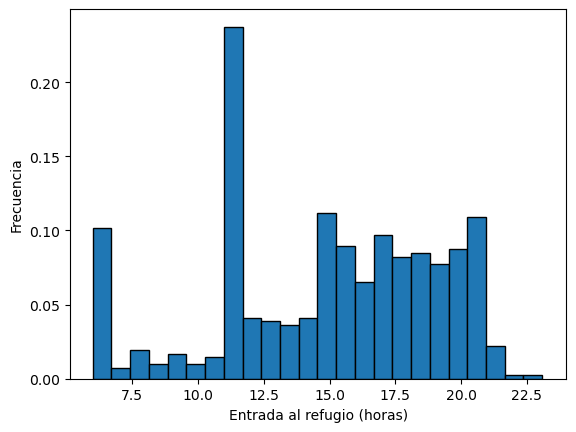

In [32]:
plt.hist(entrys_hour_and_minute,bins=24,density=True,edgecolor='black')
plt.xlim(right=24)
plt.xlabel("Entrada al refugio (horas)")
plt.ylabel("Frecuencia")
plt.show()

In [2]:
folder= "D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\todaslascampanas"
dfs,dates,t_names=rb.get_files_and_dates(folder)
file_for_sex_dict= "D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\encuentros_csv\\encuentroscompleto_only_space.csv"
df_refugios=rb.save_refugies_data(dfs,dates,t_names,cutoff_time=2300,distance_refugies=20,file_for_sex=file_for_sex_dict)

In [2]:
#path_to_Igoto="DataAnalysis\\DatosIgoto2022Todos"
folder_to_Igoto="D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\DatosIgoto2022Todos"
dfsI,datesI,t_namesI=rb.get_files_and_dates_IGOTO(folder_to_Igoto)
file_to_sex= "D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\encuentros_csv\\encuentroscompleto_only_space.csv"
df_refugiosI=rb.save_refugies_data(dfsI,datesI,t_namesI,cutoff_time=2000,distance_refugies=20,data_is_Igoto=True,file_for_sex=file_to_sex)

In [4]:
file_encuentros="D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\encuentros_csv\\encuentros20mincampanas.csv"
file_for_sex_encuentros="D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\encuentros_csv\\encuentroscompleto_only_space.csv"

### Redes bipartidas para datos de todas las campañas 

In [7]:
map=rb.make_map_from_refuguies(df_refugios,topo_map=False,refus_labels=True,refus_labels_anchor=(7,10))# topologic map 
#SAVE MAP AS HTml
map

In [4]:
map.save("D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\primerasRedes\\RedBipartitaDeRefugios\\mapa_interactivo_refugios_and_labels.html")

In [8]:
%matplotlib qt
df_refugios=rb.save_refugies_data(dfs,dates,t_names,cutoff_time=2200,distance_refugies=20,file_for_sex=file_for_sex_dict)
B=rb.get_bigraph(df_refugios,plot=True,k=0.15,nodesize=300,iters=100,weight=None)

### Redes bipartidas para datos del IGOTO 

In [6]:
mapI= rb.make_map_from_refuguies(df_refugiosI,topo_map=False,refus_labels=True,refus_labels_anchor=(7,10))
mapI

In [8]:
mapI.save("D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\primerasRedes\\RedBipartitaDeRefugios\\mapa_interactivo_refugios_and_labels_Igoto.html")

In [49]:
%matplotlib qt
B_I=rb.get_bigraph(df_refugiosI,plot=True,k=0.28,nodesize=300)

### Dias pasados en el refugio para distintas tortugas 


Aca quiero dibujar como es la acumulada de noches pasadas en el refugio para cada uno de los refuguios mas visitrados.  

In [7]:
refugies_label=df_refugiosI["refugie_label"].unique()
refugies = [df_refugiosI[df_refugiosI["refugie_label"]==refugies_label[i]].iloc[0][["lat","lon"]] for i in range(len(refugies_label))]

In [6]:
refugies_label=df_refugiosI["refugie_label"].unique()
refugies = [df_refugiosI[df_refugiosI["refugie_label"]==refugies_label[i]].iloc[0][["lat","lon"]] for i in range(len(refugies_label))]
# get list of 10 max weight edges in  B with array of refuguies and t_names
max_edges=[]
for i in range(10):
    max_weight=0
    for u,v in B_I.edges():
        if B_I[u][v]["weight"]>max_weight:
            max_weight=B_I[u][v]["weight"]
            u_max=u
            v_max=v
    max_edges.append([u_max,v_max,max_weight])
    B_I.remove_edge(u_max,v_max)
print(max_edges)


NameError: name 'B_I' is not defined

In [67]:
# draw times spend in refugie in function of day 

fig,axes = plt.subplots(2,3,figsize=(15,10))
#axes[1][2].set_visible(False)


for h in range(6):
    if h==5:
        i=4
    elif h==4:
        i=5
    else:
        i=h
    edge_place=i
    Tort= max_edges[edge_place][0]
    # location of max_edges[edge_place][1] in refugies label 
    ref= refugies[int(max_edges[edge_place][1])]
    v_max = max_edges[edge_place][1]

    df_refI_tort = df_refugiosI[df_refugiosI["t_name"]==Tort]
    df_refI_tort = df_refI_tort.reset_index(drop=True)
    df_refI_tort["date"] = pd.to_datetime(df_refI_tort["date"],format="%d/%m/%Y")
    df_refI_tort = df_refI_tort.sort_values(by="date")
    df_refI_tort = df_refI_tort.reset_index(drop=True)
    df_refI_tort["date"] = df_refI_tort["date"].dt.strftime("%d/%m/%Y")
    time_in_ref = np.zeros(len(df_refI_tort))
    dates= []
    for j in range(len(df_refI_tort)):
        df_aux= df_refI_tort.iloc[j]
        date_str= df_aux["date"].split("/2022")[0]
        dates.append(date_str)
        # check if ref lat and lon are equal to df_aux["lat"] and df_aux["lon"]
        if df_aux["lat"]==ref[0] and df_aux["lon"]==ref[1]:
            if j==0:
                time_in_ref[j]=1
            else:
                time_in_ref[j]= time_in_ref[j-1]+1
        else : 
            if j==0:
                time_in_ref[j]=0
            else:
                time_in_ref[j]= time_in_ref[j-1]
    ax= plt.subplot(2,3,h+1)
    ax.plot(dates,time_in_ref)
    #show only small ticks for the rest of the x_ticks
    # set major ticks in 45 degree location
   
    ax.xaxis.set_major_locator(MultipleLocator(6))
    ax.tick_params(axis="x",labelrotation=45)
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylabel("Nights in refugie")
    #show ytiks as integers
    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.set_title("Turtle "+Tort+" in burrow " + str(v_max))
    # set grid on minor ticks
    ax.grid(which='both', alpha=0.2)
# change position of subplo
fig.tight_layout()
plt.show()

In [9]:
# draw times spend in refugie in function of only for T54

#axes[1][2].set_visible(False)
%matplotlib qt
#['T54', '3', 26]
# 'T54', '12', 20] 
Tort= "T54"
fig,ax = plt.subplots()
df_refI_tort = df_refugiosI[df_refugiosI["t_name"]==Tort]
df_refI_tort = df_refI_tort.reset_index(drop=True)
df_refI_tort["date"] = pd.to_datetime(df_refI_tort["date"],format="%d/%m/%Y")
df_refI_tort = df_refI_tort.sort_values(by="date")
df_refI_tort = df_refI_tort.reset_index(drop=True)
df_refI_tort["date"] = df_refI_tort["date"].dt.strftime("%d/%m/%Y")

time_in_ref_3 = np.zeros(len(df_refI_tort))
time_in_ref_12 = np.zeros(len(df_refI_tort))
dates= []
for j in range(len(df_refI_tort)):
    df_aux= df_refI_tort.iloc[j]
    date_str= df_aux["date"].split("/2022")[0]
    dates.append(date_str)
    # check if ref lat and lon are equal to df_aux["lat"] and df_aux["lon"]
    if df_aux["refugie_label"]=="3":
        if j==0:
            time_in_ref_3[j]=1
            time_in_ref_12[j]=0
        else:
            time_in_ref_3[j]= time_in_ref_3[j-1]+1
            time_in_ref_12[j]=time_in_ref_12[j-1]
    elif df_aux["refugie_label"]=="12": 
        if j==0:
            time_in_ref_12[j]=1
            time_in_ref_3[j]=0
        else:
            time_in_ref_12[j]= time_in_ref_12[j-1]+1
            time_in_ref_3[j]=time_in_ref_3[j-1]
    else:
        if j==0:
            time_in_ref_3[j]=0
            time_in_ref_12[j]=0
        else: 
            time_in_ref_3[j]=time_in_ref_3[j-1]
            time_in_ref_12[j]=time_in_ref_12[j-1]


ax.xaxis.set_major_locator(MultipleLocator(6))
ax.tick_params(axis="x",labelrotation=45)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_ylabel("Nights in burrow")
#show ytiks as integers
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.plot(dates,time_in_ref_3, label= "ref 3" )
ax.plot(dates,time_in_ref_12,label = "ref 12")
# set grid on minor ticks
ax.grid(which='both', alpha=0.4)
# change position of subplo
ax.legend()
plt.show()

In [62]:
df_aux["date"].split("/2022")[0]

'31/01'

Idea para mejorar ploteo: 

-  Tomar una tortuga en particular y dibujar en un mapa su recorrido por los refugios, tamaño de refugios segun cantidad de noches pasadas y lineas que unen su recorrido (es decir si paso una noche por ejemplo en 30 y la siguiente en 20, linea entre 30 y 20).

In [13]:
for t_name in t_namesI:
    map_t = rb.turtle_ref_path_map(t_name=t_name,df_of_refugies=df_refugiosI,node_r_norm=3,oppacity_lines=0.71)
    map_t.save("D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\primerasRedes\\RedBipartitaDeRefugios\\refugiesPaths\\mapa_"+t_name+"_refugies.html")

d:\facultad\IB5toCuatri\Tesis\MaestriaMarco\DataAnalysis\primerasRedes\redes_bipartitas_de_refugios.py:395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref_turtle["date"] = pd.to_datetime(df_ref_turtle["date"],format="%d/%m/%Y")
d:\facultad\IB5toCuatri\Tesis\MaestriaMarco\DataAnalysis\primerasRedes\redes_bipartitas_de_refugios.py:395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref_turtle["date"] = pd.to_datetime(df_ref_turtle["date"],format="%d/%m/%Y")
d:\facultad\IB5toCuatri\Tesis\MaestriaMarco\

Armar gif con formacion de caminos: 

In [5]:
# make copy of t_namesI without T54
# t_namesI for making it 

for t_name in ["T54"]:
   #rb.make_html_temporal_maps(t_name=t_name,df_of_refugies=df_refugiosI,node_r_norm=3,oppacity_lines=0.25,line_size=3,frames_per_day=5,zoom_in_map=16,add_ref_label=True)
   print("htmls done for "+t_name)

   folder_htmls = "D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\primerasRedes\\gif_construccion_mapas\\"+t_name
   rb.make_pngs_from_htmls(folder_htmls,remove_htmls=False)
   print("pngs done for "+t_name)
   save_name= "D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\primerasRedes\\gif_construccion_mapas\\gif_"+t_name+"T54_refugies"
   rb.make_gif(folder_htmls,low_quality=False,save_name=save_name)
   print("gif "+t_name+" done")

htmls done for T54
pngs done for T54
gif T54 done


### Metrica de distribución espacial de los refugios 



Idea: 
Se encuentra el centro de masa de los refugios, como un promedio ponderado en cantidad de noches en el refugio y se calculan las distancias de cada refugio al centro de masa pesadas por la cantidad de noches en el refugio.

$X_{centro}= \sum^{N -1}_{n=0} \frac{i_{n} X_n}{I_{totales}} $

Donde $I_{totales}$ es la cantidad de noches donde se registro que la tortuga durmio en un refugio (depende de cada tortuga), $X_n$ es la coordenada X del refugio n, $i_{n}$ es la cantidad de noches que la tortuga durmio en el refugio n y N la cantidad de refugios totales.  Este proceso se calcula para todas las tortugas. 
Partiendo de $X_{centro}$, la distribucion espacial de los refugios se calcula como:


$D = \sum^{N -1}_{n=0} \frac{|X_n i_n - X_{centro}|}{I_{totales}}$

In [ ]:
df_refugios_complete= pd.concat([df_refugios,df_refugiosI])
df_space_dist = rb.get_mass_center_and_spatialD(df_refugios_complete)


In [ ]:
# get mean value for "machos" and "hembras" of the spatial distance
df_space_dist_heambras= df_space_dist[df_space_dist["sex"]=="hembra"]
df_space_dist_machos= df_space_dist[df_space_dist["sex"]=="macho"]
print("mean spatial distance for hembras refugies: ",round(df_space_dist_heambras["spatialD"].mean()),"m , with std: ",round(df_space_dist_heambras["spatialD"].std()),"m")



print("mean spatial distance for machos refugies: ",round(df_space_dist_machos["spatialD"].mean()),"m , with std: ",round(df_space_dist_machos["spatialD"].std()),"m")

mean spatial distance for hembras refugies:  122 m , with std:  82 m
mean spatial distance for machos refugies:  128 m , with std:  66 m


### Proyeccion de red bipartida

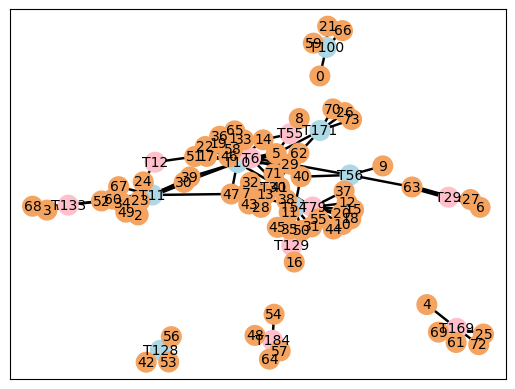

In [10]:
B=rb.get_bigraph(df_refugios,plot=True,k=0.15)

In [13]:
df_refugios.head( 

)

,lat,lon,date,t_name,sex,refugie_label
0,-40.58205,-64.99729,1/12/2020,T100,macho,0
1,-40.58413,-64.9989,1/12/2020,T10,macho,1
2,-40.58456,-64.99709,1/12/2020,T11,macho,2
3,-40.585418,-64.99736,1/12/2020,T133,hembra,3
4,-40.585162,-64.996088,1/12/2020,T169,hembra,4


In [15]:
G_from_ref= bipartite.projected_graph(B,df_refugios["t_name"].unique())
G_from_ref_ref= bipartite.projected_graph(B,df_refugios["refugie_label"].unique().astype(str))

In [24]:
t_names = list(G_from_ref.nodes())


In [39]:
#dibujar grafo para tortus
# get colors from G_from_ref 
%matplotlib qt
nx.draw(G_from_ref,pos=nx.spring_layout(G_from_ref,k=1.3),font_size=10,node_size=300,with_labels=True,node_color=rb.get_colors_turtles(df_refugios,list(G_from_ref.nodes())),width=0.5)
plt.show()

In [29]:
#dibujar grafo para refugios 
nx.draw(G_from_ref_ref,pos=nx.spring_layout(G_from_ref_ref,k=0.4),font_size=10,node_size=300,with_labels=True,node_color="sandybrown",width=0.5)
plt.show()

In [40]:
# plot G using networkx
# dont plot nodes that are not connected
remove_nodes= False
# get list of nodes that are connected
nodes_connected=[]
for u,v in G_from_ref.edges():
    nodes_connected.append(u)
    nodes_connected.append(v)
nodes_connected_refus=np.unique(nodes_connected)
# get list of nodes that are not connected
nodes_not_connected=[]
for node in G_from_ref.nodes():
    if node not in nodes_connected:
        nodes_not_connected.append(node)
# remove from G nodes that are not connected
if remove_nodes:
    G_from_ref.remove_nodes_from(nodes_not_connected)
t_nodes_from_ref= G_from_ref.nodes()
color_t= rb.get_colors_turtles(df_refugios,t_nodes_from_ref)
#plot G
plt.figure()
nx.draw(G_from_ref,pos=nx.spring_layout(G_from_ref,k=0.5),with_labels=True,node_size=300,node_color=color_t,font_size=10)
plt.show()

### Comparacion red de encuentros con red de refugios

Comparacion con red de encuentros 20min y 20m. $\\$
En esta comparacion voy a tomar a la proyeccion de la red de refugios como predictor de la red de encuentros, de esta forma puedo usar metricas como recall, accuaracy y precision para compararlas tomando los edge de la red de encuentros como verdaderos y los edge de la red de refugios como predichos.

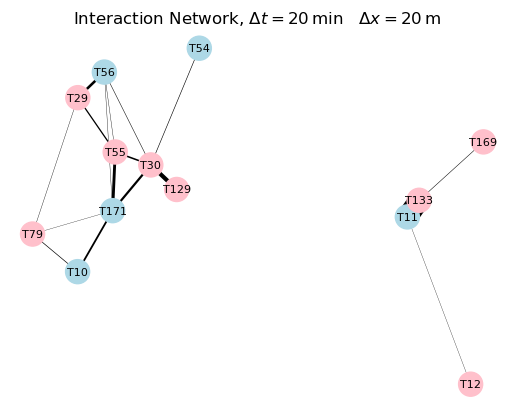

In [9]:
file_encuentros="D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\encuentros_csv\\encuentros20mincampanas.csv"
file_for_sex_encuentros="D:\\facultad\\IB5toCuatri\\Tesis\\MaestriaMarco\\DataAnalysis\\encuentros_csv\\encuentroscompleto_only_space.csv"
title=r"Interaction Network, $\Delta t = 20\,$min   $\Delta x= 20\,$m "
G_encuentros=grafoDeCsvEncuentros.plot_weighted_graph(file_encuentros,title,save=False,save_name="name_fig",get_sex_from_file=True,file_for_sex=file_for_sex_encuentros)

In [10]:
# check if nodes are the same
t_nodes_from_encuentros= G_encuentros.nodes()
print("len nodes_connected_refus: ",len(nodes_connected_refus))
print("len t_nodes_from_encuentros: ",len(t_nodes_from_encuentros))
#check wich nodes are different comparing two lists
t_nodes_from_encuentros= list(t_nodes_from_encuentros)
nodes_connected_refus= list(nodes_connected_refus) 
for i in range(len(t_nodes_from_encuentros)):
    if t_nodes_from_encuentros[i] not in nodes_connected_refus:
        print("node not in refus: ",t_nodes_from_encuentros[i])
for i in range(len(nodes_connected_refus)):
    if nodes_connected_refus[i] not in t_nodes_from_encuentros:
        print("node not in encuentros: ",nodes_connected_refus[i])

len nodes_connected_refus:  13
len t_nodes_from_encuentros:  13
node not in refus:  T169
node not in encuentros:  T6


In [11]:
TP,FP,FN,TN = rb.comparing_two_networks(G_predictor=G_from_ref,G_messaured=G_encuentros)

In [12]:
print("Presision :",TP/(TP+FP))
print("Recall :",TP/(TP+FN))
print("Accuary :", (TP+TN)/(TP+TN+FP+FN))

Presision : 0.34615384615384615
Recall : 0.5294117647058824
Accuary : 0.5098039215686274


#### Separacion de dias entre encuentros y noche donde usaron refugio

Otra cosa que me gustaria ver es si los refugios compartidos pasan en dias consecutivos o en el mismo dia. Si los dias estan muy separados me parece que es interesante el resultado. $\\$

Plan para encaralo:
1. Buscar en dfrefugios para refugios compartidos, los dias en que cada tortuga estuvo en ese refugio. 
2. Encontrar la minima separacion en tiempo entre los dias de cada tortuga en el refugio.
3. Despues estaria bueno ver el día mas cercano donde se registro un encuentro. 


In [14]:
df_min_dist_enc_ref = rb.nearest_days_in_ref_to_encounters(file_encuentros=file_encuentros,df_refugios=df_refugios)

In [15]:
# check how many min_dist_encounter are less than 2

encounters_less_than3_days = df_min_dist_enc_ref[df_min_dist_enc_ref["min_dist_encounter"]<2]
print("Encuentros separados en menos de 2 dias de noches en refu:",round(len(encounters_less_than3_days)/len(df_min_dist_enc_ref)*100),"%")

Encuentros separados en menos de 2 dias de noches en refu: 24 %


#### Metricas sobre redes sociales


In [19]:
# density
networ_density_refus = nx.density(G_from_ref)
networ_density_encounters = nx.density(G_encuentros)
# degree centralization
degree_centralization_refus = nx.degree_centrality(G_from_ref)
degree_centralization_encounters = nx.degree_centrality(G_encuentros)
# modularity
t_machos_ref = df_refugios[df_refugios["sex"]=="macho"]["t_name"].unique()
t_hembras_ref = df_refugios[df_refugios["sex"]=="hembra"]["t_name"].unique()
modularity_ref_mach_hemb = nx.algorithms.community.modularity(G_from_ref, [t_machos_ref,t_hembras_ref])
sex_dict_for_encounters = rb.get_sex_dict(file_for_sex=file_for_sex_encuentros)
t_machos_enc = []
t_hembras_enc = []
for node in G_encuentros.nodes():
    if sex_dict_for_encounters[node]=="macho":
        t_machos_enc.append(node)
    else: 
        t_hembras_enc.append(node)
modularity_encounters_mach_hemb = nx.algorithms.community.modularity(G_encuentros, [t_machos_enc,t_hembras_enc])
#clustering coefficient
clustering_coef_ref = nx.average_clustering(G_from_ref)
clustering_coef_enc = nx.average_clustering(G_encuentros)
# get degree sequence of networks 
degree_sequence_ref = sorted([d for n, d in G_from_ref.degree()], reverse=True)  # degree sequence
degree_sequence_enc = sorted([d for n, d in G_encuentros.degree()], reverse=True)  # degree sequence



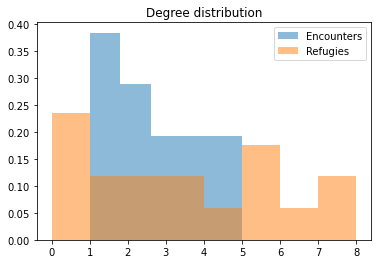

In [47]:
# plot degree_distribution
plt.figure()
plt.title("Degree distribution")
plt.hist(degree_sequence_enc, bins=5, density=True, alpha=0.5, label="Encounters")
plt.hist(degree_sequence_ref, bins=8, density=True, alpha=0.5, label="Refugies")
plt.legend(loc='upper right')
plt.show()

Network density: 
De la cantidad de posibles edges, cuantos estan presentes en la red encontrada. Valores bajos indican que la red es dispersa, valores altos indican que la red es densa. $\\$
Modularity:
Es una medida de la estructura de la red. Valores altos indican que los nodos estan agrupados en estas comunidades, valores bajos indican que los nodos no estan agrupados en comunidades y que no hay fuerza de union entre esta comunidad en la red. $\\$
Clustering coefficient:
Es una medida de la densidad de la red. Valores altos indican que los nodos estan conectados entre si, valores bajos indican que los nodos no estan conectados entre si. $\\$




In [18]:
# print each metric for network 
print("Network density refugies: ",networ_density_refus)
print("Network density encounters: ",networ_density_encounters)
#print("Degree centralization refugies: ",degree_centralization_refus)
#print("Degree centralization encounters: ",degree_centralization_encounters)
print("Modularity refugies: ",modularity_ref_mach_hemb)
print("Modularity encounters: ",modularity_encounters_mach_hemb)
print("Clustering coef refugies: ",clustering_coef_ref)
print("Clustering coef encounters: ",clustering_coef_enc)


Network density refugies:  0.19117647058823528
Network density encounters:  0.21794871794871795
Modularity refugies:  -0.0776627218934911
Modularity encounters:  -0.275810383200352
Clustering coef refugies:  0.38459383753501397
Clustering coef encounters:  0.2846153846153846


In [17]:

modularity_ref =  nx.algorithms.community.modularity(G_from_ref,nx.algorithms.community.label_propagation_communities(G_from_ref))
print("Modularity refugies: ",modularity_ref)
modularity_encounters = nx.algorithms.community.modularity(G_encuentros,nx.algorithms.community.label_propagation_communities(G_encuentros))
print("Modularity encounters: ",modularity_encounters)

Modularity refugies:  0.0
Modularity encounters:  0.49563960090236014


Se observa de "modularity" que no hay agrupacion entre machos y hembras en ambas redes. Si se encuentra una division en dos subgrupos para la red de encuentros, siendo estos los subgrupos: 

In [37]:
for i in nx.algorithms.community.label_propagation_communities(G_encuentros):
    print(i)

{'T54', 'T129', 'T55', 'T79', 'T171', 'T29', 'T30', 'T10', 'T56'}
{'T133', 'T12', 'T11', 'T169'}


In [20]:
# degree centrality variation 
degree_cen_machos = [ degree_centralization_refus[node] for node in t_machos_ref]
degree_cen_hembras = [ degree_centralization_refus[node] for node in t_hembras_ref]
# same for encounters
degree_cen_machos_enc = [ degree_centralization_encounters[node] for node in t_machos_enc]
degree_cen_hembras_enc = [ degree_centralization_encounters[node] for node in t_hembras_enc]


Degree centrality:
Es una medida de la importancia de un nodo en la red. Valores altos indican que el nodo es importante en la red, valores bajos indican que el nodo no es importante en la red. Se calcularon para machos y hembras. 

In [21]:
# get mean and std for each 
mean_machos = np.mean(degree_cen_machos)
mean_hembras = np.mean(degree_cen_hembras)
std_machos = np.std(degree_cen_machos)
std_hembras = np.std(degree_cen_hembras)
# same for encounters
mean_machos_enc = np.mean(degree_cen_machos_enc)
mean_hembras_enc = np.mean(degree_cen_hembras_enc)
std_machos_enc = np.std(degree_cen_machos_enc)
std_hembras_enc = np.std(degree_cen_hembras_enc)
# print mean and std for each
print("Mean degree centrality machos refugies: ",mean_machos)
print("Mean degree centrality hembras refugies: ",mean_hembras)
print("Std degree centrality machos refugies: ",std_machos)
print("Std degree centrality hembras refugies: ",std_hembras)
# same for encounters
print("Mean degree centrality machos encounters: ",mean_machos_enc)
print("Mean degree centrality hembras encounters: ",mean_hembras_enc)
print("Std degree centrality machos encounters: ",std_machos_enc)
print("Std degree centrality hembras encounters: ",std_hembras_enc)



Mean degree centrality machos refugies:  0.22321428571428573
Mean degree centrality hembras refugies:  0.16875
Std degree centrality machos refugies:  0.16656034023372882
Std degree centrality hembras refugies:  0.14803399102908762
Mean degree centrality machos encounters:  0.23333333333333334
Mean degree centrality hembras encounters:  0.20833333333333331
Std degree centrality machos encounters:  0.1224744871391589
Std degree centrality hembras encounters:  0.11785113019775792


#### Double edge swap y comparacion de metricas obtenidas en ambas redes

In [40]:
# make double edge swap on G_encuentros
#get number of edges in G_encuentros
num_edges = len(B.edges())*100
trys =1000
iters= 1000
degrees_cen_machos,degrees_cen_hembras,degrees_cen_machos_std,degrees_cen_hembras_std,networ_densitys,modularitys,clustering_coefs = [],[],[],[],[],[],[]

for i in range(iters):
    B_double_edge_swap = rb.swap_conections_in_bigraph(B,swaps=num_edges,max_trys=trys)
    G_ref_double_edge_swap = bipartite.projected_graph(B_double_edge_swap,df_refugios["t_name"].unique())
    modularitys.append(nx.algorithms.community.modularity(G_ref_double_edge_swap,nx.algorithms.community.label_propagation_communities(G_ref_double_edge_swap)))
    networ_densitys.append(nx.density(G_ref_double_edge_swap))
    clustering_coefs.append(nx.average_clustering(G_ref_double_edge_swap))
    # get degree sequence of networks
    degree_centralization_encounters_double_edge = nx.degree_centrality(G_ref_double_edge_swap)
    degree_cen_machos_enc_double_edge = [ degree_centralization_encounters_double_edge[node] for node in t_machos_enc]
    degree_cen_hembras_enc_double_edge = [ degree_centralization_encounters_double_edge[node] for node in t_hembras_enc]
    degrees_cen_machos.append(np.mean(degree_cen_machos_enc_double_edge))
    degrees_cen_hembras.append(np.mean(degree_cen_hembras_enc_double_edge))
    degrees_cen_machos_std.append(np.std(degree_cen_machos_enc_double_edge))
    degrees_cen_hembras_std.append(np.std(degree_cen_hembras_enc_double_edge))


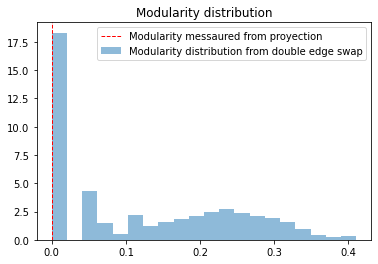

In [45]:
# make histogram of  modularitys 
plt.figure()
plt.title("Modularity distribution")
plt.hist(modularitys, bins=20, density=True, alpha=0.5, label="Modularity distribution from double edge swap")
# MAKE LINE DOTS FOR modularity encounters 
plt.axvline(x=modularity_ref, color='r', linestyle='dashed', linewidth=1, label="Modularity messaured from proyection")
plt.legend(loc='upper right')
plt.show()




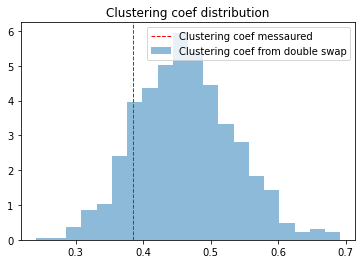

In [42]:
# make histogram of clustering coef
plt.figure()
plt.title("Clustering coef distribution")
plt.hist(clustering_coefs, bins=20, density=True, alpha=0.5, label="Clustering coef distribution from double swap")
# MAKE LINE DOTS FOR clustering coef encounters
plt.axvline(x=clustering_coef_ref, color='r', linestyle='dashed', linewidth=1, label="Clustering coef messaured")
plt.legend(loc='upper right')
plt.show()



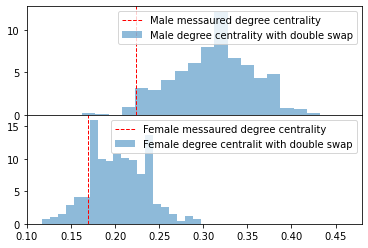

In [43]:
#plot degree centrality for machos and hembras in two different plot
# make subplot with shared x axis

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

fig.subplots_adjust(hspace=0)

ax1.hist(degrees_cen_machos, bins=20, density=True, alpha=0.5, label="Male degree centrality with double swap")
ax1.axvline(x=mean_machos, color='r', linestyle='dashed', linewidth=1, label="Male messaured degree centrality")
ax1.legend(loc='upper right')


ax2.hist(degrees_cen_hembras, bins=20, density=True, alpha=0.5, label="Female degree centralit with double swap")
ax2.axvline(x=mean_hembras, color='r', linestyle='dashed', linewidth=1, label = "Female messaured degree centrality")
ax2.legend(loc='upper right')
plt.show()


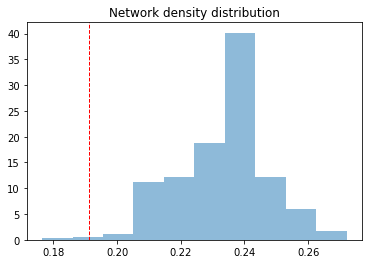

In [44]:
#plot network density 
plt.figure()
plt.title("Network density distribution")
plt.hist(networ_densitys, bins=10, density=True, alpha=0.5, label="Network density from double swap")
# MAKE LINE DOTS FOR network density ref
plt.axvline(x=networ_density_refus, color='r', linestyle='dashed', linewidth=1, label="Network density messaured")
plt.legend(loc='upper right')
plt.show()

### Sobre proyeccion de red de refugios 

In [5]:
B,refugies_locations=rb.get_bigraph(df_refugios,plot=False,k=0.15,return_refugies=True)
G_from_ref= bipartite.projected_graph(B,df_refugios["t_name"].unique())
G_from_ref_ref= bipartite.projected_graph(B,df_refugios["refugie_label"].unique().astype(int))

In [6]:
%matplotlib qt
#dibujar grafo para refugios 
nx.draw(G_from_ref_ref,pos=nx.spring_layout(G_from_ref_ref,k=0.2),font_size=10,node_size=200,with_labels=True,node_color="sandybrown",width=0.5)
plt.show()

#### Mapa con conecciones entre refugios 


In [6]:
map_with_conections = rb.plot_conections_in_map(G_from_ref_ref,refugies_locations)

In [8]:
map_with_conections.save("map_refugies_with_conections.html")

#### Mantel test entre matriz de adyacencia de refugios y distancias entre refugios

Esta relacionado las conexiones entre refugios con la distancia entre ellos?

In [7]:
adj_m_from_ref,distances_m_from_ref = rb.matrix_distance_and_adjancency(G_from_ref_ref,refugies_locations)

In [8]:
import mantel

In [23]:
comparision_result = mantel.test(adj_m_from_ref,distances_m_from_ref,method='pearson',perms=1000000,tail="two-tail")

Printing the result shows the veridical correlation, empirical p-value, and z-score:

In [40]:
print(comparision_result)
print("comparision p value <0.05",comparision_result.p < 0.05)
print(comparision_result.correlations)
print(comparision_result.mean)
print(comparision_result.std)

MantelResult(-0.20248655679036756, 1e-06, -6.1429395424146325)
comparision p value <0.05 True
[-0.20248656  0.04010634  0.08226737 ... -0.00130969  0.01041526
 -0.07250445]
5.907012944552266e-05
0.03297210163331635


MantelResult.correlations array: Sample correlations $\\$
MantelResult.mean float: Mean of sample correlations $\\$
MantelResult.std float: Standard deviation of sample correlations